In [34]:
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
import pandas as pd
import seaborn as sns
import re

In [24]:
data_dir = "../data/aruba/data.csv"
df_aruba = pd.read_csv(
    data_dir,
    delim_whitespace=True,
    names=[
        "date",
        "time",
        "sensor_type",
        "sensor_status",
        "meta",
        "meta_begin_end",
    ],
)

pattern_motion_sensor = r"[M]{1}[0-9]{3,}"
pattern_temperature_sensor = r"[T]{1}[0-9]{3,}"
pattern_door_closure_sensor = r"[D]{1}[0-9]{3,}"

# Create subsets for each sensor type
df_motion_sensor = df_aruba[
    df_aruba["sensor_type"].str.match(pattern_motion_sensor)
]
df_temperature_sensor = df_aruba[
    df_aruba["sensor_type"].str.match(pattern_temperature_sensor)
]
df_door_closure_sensor = df_aruba[
    df_aruba["sensor_type"].str.match(pattern_door_closure_sensor)
]

display(df_temperature_sensor)
display(df_temperature_sensor["date"])

/tmp/ipykernel_2815/3643230736.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_aruba = pd.read_csv(


,date,time,sensor_type,sensor_status,meta,meta_begin_end
2,2010-11-04,00:15:08.984841,T002,21.5,NaN,NaN
3,2010-11-04,00:30:19.185547,T003,21,NaN,NaN
4,2010-11-04,00:30:19.385336,T004,21,NaN,NaN
5,2010-11-04,00:35:22.24587,T005,20.5,NaN,NaN
6,2010-11-04,00:40:25.428962,T005,21,NaN,NaN
...,...,...,...,...,...,...
1719553,2011-06-11,23:42:59.28507,T002,25.5,NaN,NaN
1719554,2011-06-11,23:48:02.888409,T001,23.5,NaN,NaN
1719555,2011-06-11,23:48:02.988798,T002,25,NaN,NaN
1719556,2011-06-11,23:53:06.4292,T002,25.5,NaN,NaN


2          2010-11-04
3          2010-11-04
4          2010-11-04
5          2010-11-04
6          2010-11-04
              ...    
1719553    2011-06-11
1719554    2011-06-11
1719555    2011-06-11
1719556    2011-06-11
1719557    2011-06-11
Name: date, Length: 116572, dtype: object

,date,time,sensor_type,sensor_status,meta,meta_begin_end,datetime
2,2010-11-04,00:15:08.984841,T002,21.5,NaN,NaN,2010-11-04 00:15:08.984841
3,2010-11-04,00:30:19.185547,T003,21.0,NaN,NaN,2010-11-04 00:30:19.185547
4,2010-11-04,00:30:19.385336,T004,21.0,NaN,NaN,2010-11-04 00:30:19.385336
5,2010-11-04,00:35:22.24587,T005,20.5,NaN,NaN,2010-11-04 00:35:22.245870
6,2010-11-04,00:40:25.428962,T005,21.0,NaN,NaN,2010-11-04 00:40:25.428962
...,...,...,...,...,...,...,...
1719553,2011-06-11,23:42:59.28507,T002,25.5,NaN,NaN,2011-06-11 23:42:59.285070
1719554,2011-06-11,23:48:02.888409,T001,23.5,NaN,NaN,2011-06-11 23:48:02.888409
1719555,2011-06-11,23:48:02.988798,T002,25.0,NaN,NaN,2011-06-11 23:48:02.988798
1719556,2011-06-11,23:53:06.4292,T002,25.5,NaN,NaN,2011-06-11 23:53:06.429200


['T001', 'T002', 'T003', 'T004', 'T005']


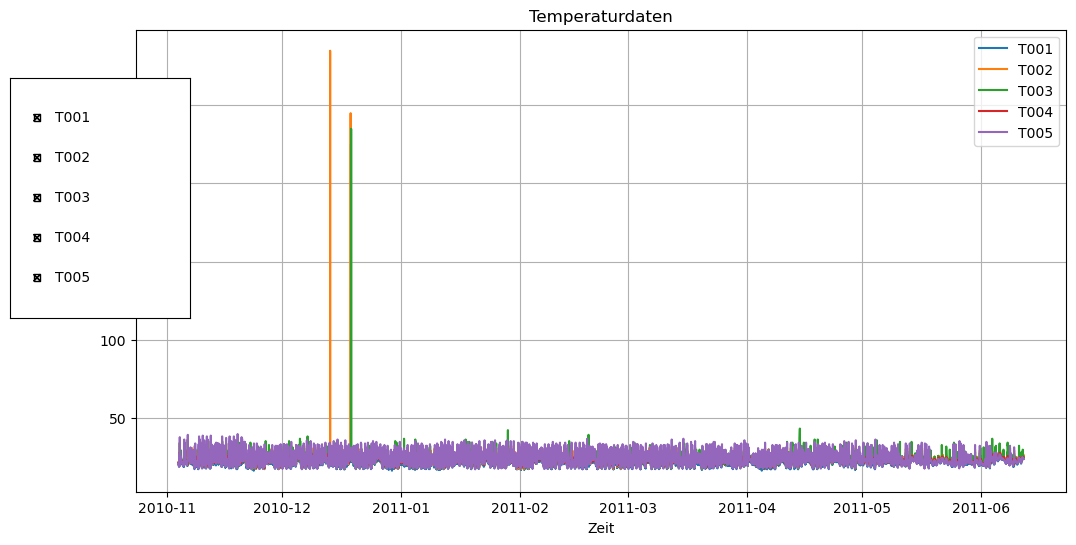

In [35]:
# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt
df_temperature_sensor['datetime'] = pd.to_datetime(df_temperature_sensor['date'] + ' ' + df_temperature_sensor['time'])
display(df_temperature_sensor)

# Sortiere die Daten nach Datum und Uhrzeit
df_temperature_sensor = df_temperature_sensor.sort_values(by='datetime')

# Konvertiere die sensor_status-Spalte in numerische Werte
df_temperature_sensor['sensor_status'] = pd.to_numeric(df_temperature_sensor['sensor_status'], errors='coerce')

# Erstelle ein Diagramm für jeden Temperatursensor
unique_sensors = df_temperature_sensor['sensor_type'].unique()

# Array basierend auf den numerischen Teilen der IDs sortieren
sorted_sensors = sorted(unique_sensors, key=lambda x: int(x[1:]))
print(sorted_sensors)

# Interaktive Darstellung mit CheckButtons
fig, ax = plt.subplots(figsize=(12, 6))

# Linien für jeden Sensor speichern
lines = {}
for sensor_id in sorted_sensors:
    sensor_data = df_temperature_sensor[df_temperature_sensor['sensor_type'] == sensor_id]
    line, = ax.plot(sensor_data['datetime'], sensor_data['sensor_status'], label=sensor_id)
    lines[sensor_id] = line

ax.set_title("Temperaturdaten")
ax.set_xlabel("Zeit")
ax.set_ylabel("Temperatur")
ax.legend()
ax.grid(True)

# CheckButtons hinzufügen
rax = plt.axes([0.02, 0.4, 0.15, 0.4])  # Position der CheckButtons [x, y, Breite, Höhe]
visibility = [True] * len(sorted_sensors)  # Alle Graphen starten sichtbar
check = CheckButtons(rax, sorted_sensors, visibility)

# Funktion zum Aktualisieren der Sichtbarkeit
def toggle_visibility(label):
    line = lines[label]
    line.set_visible(not line.get_visible())
    plt.draw()

check.on_clicked(toggle_visibility)

plt.show()


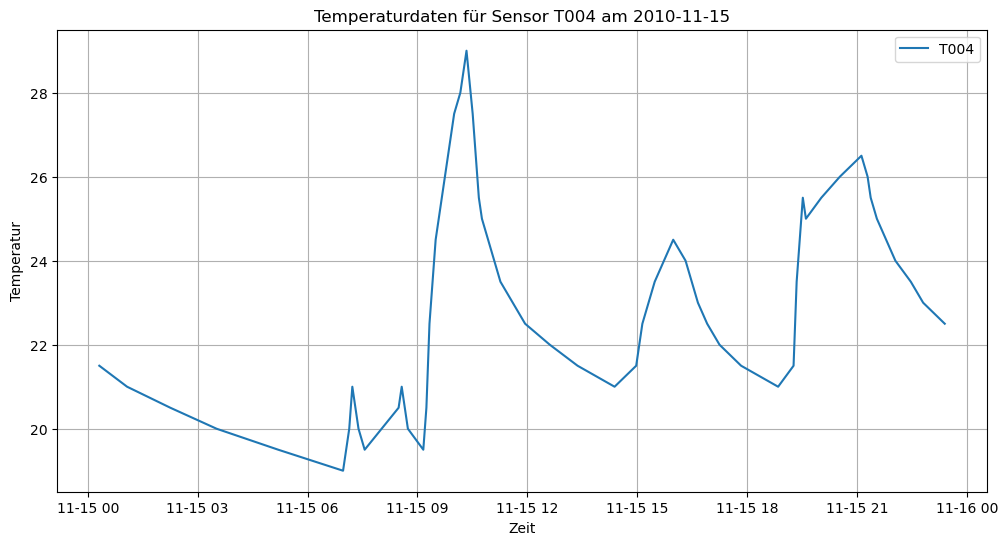

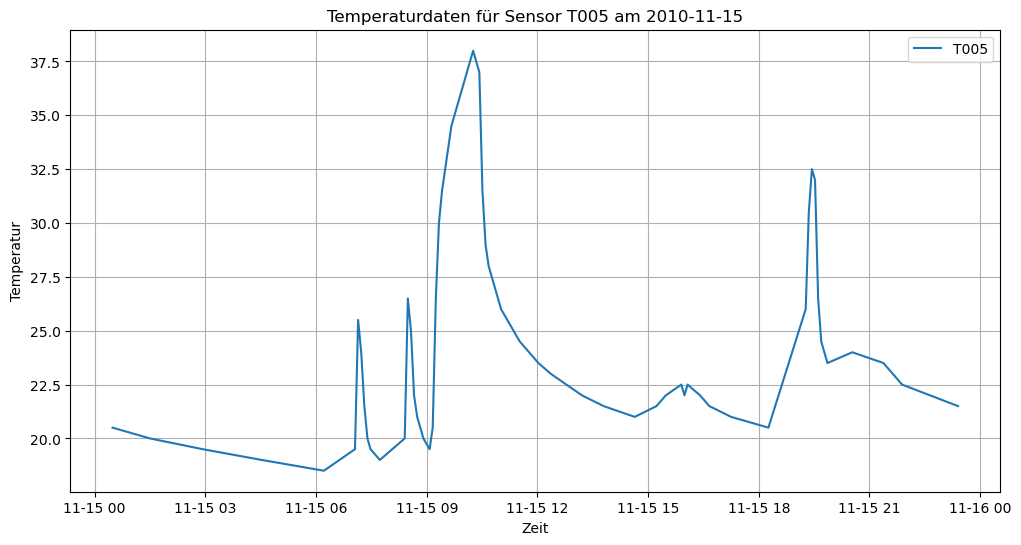

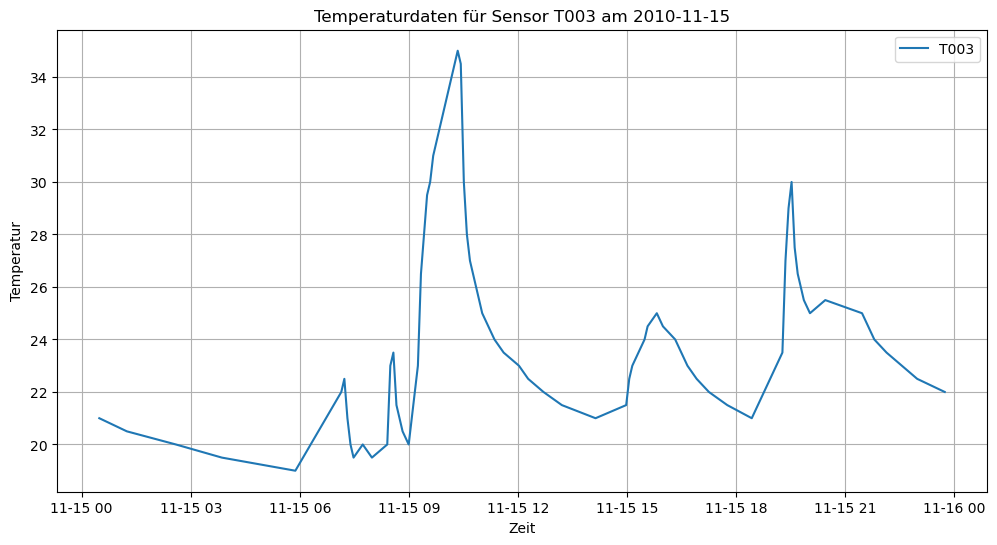

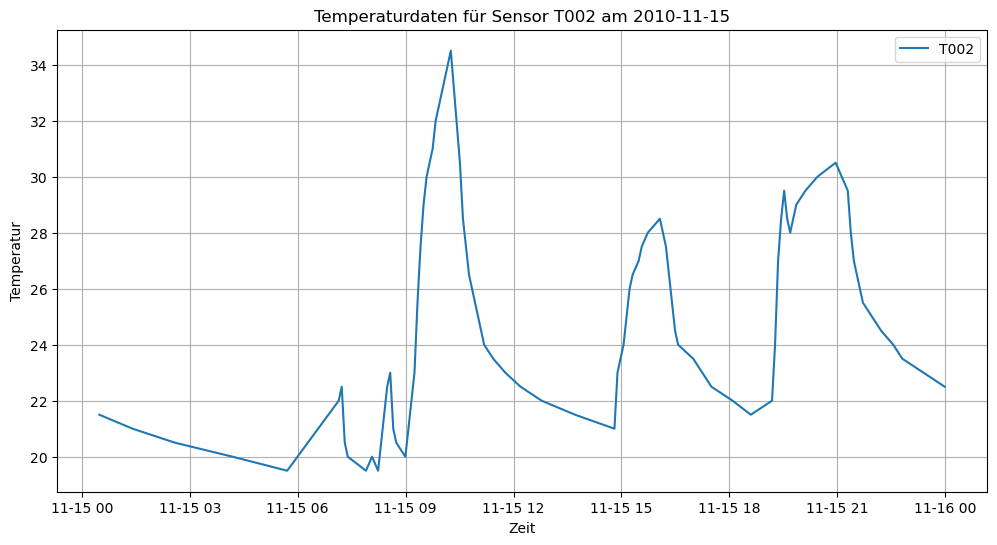

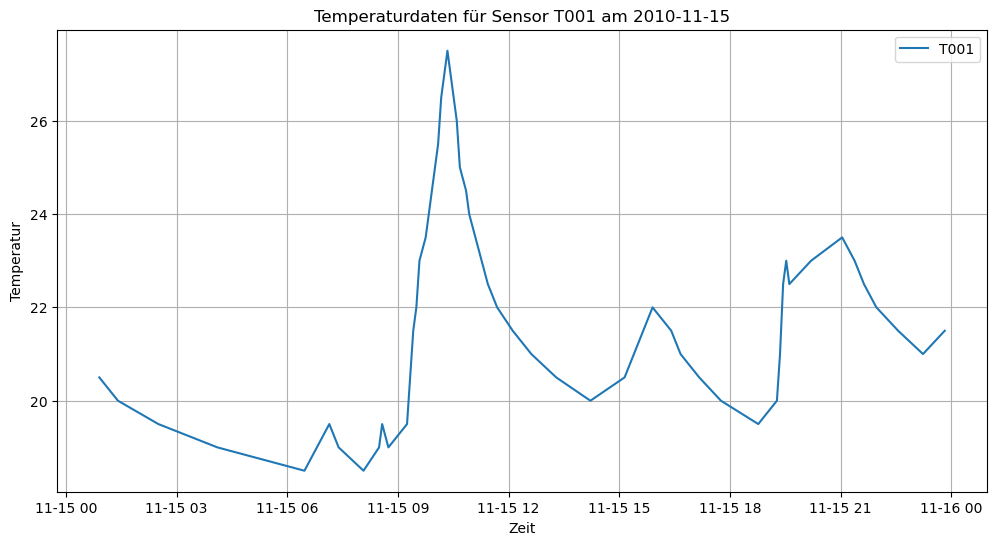

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Datum für Filterung angeben
selected_date = "2010-11-15"

# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt
df_temperature_sensor['datetime'] = pd.to_datetime(df_temperature_sensor['date'] + ' ' + df_temperature_sensor['time'])

# Konvertiere die sensor_status-Spalte in numerische Werte
df_temperature_sensor['sensor_status'] = pd.to_numeric(df_temperature_sensor['sensor_status'], errors='coerce')

# Filtere die Daten für den ausgewählten Tag
df_temperature_sensor['date_only'] = df_temperature_sensor['datetime'].dt.date
filtered_data = df_temperature_sensor[df_temperature_sensor['date_only'] == pd.to_datetime(selected_date).date()]

# Sortiere die gefilterten Daten
filtered_data = filtered_data.sort_values(by='datetime')

# Erstelle ein Diagramm für jeden Temperatursensor für den ausgewählten Tag
unique_sensors = filtered_data['sensor_type'].unique()

for sensor_id in unique_sensors:
    # Daten für den aktuellen Sensor filtern
    sensor_data = filtered_data[filtered_data['sensor_type'] == sensor_id]
    
    # Neues Diagramm erstellen
    plt.figure(figsize=(12, 6))
    plt.plot(sensor_data['datetime'], sensor_data['sensor_status'], label=sensor_id)
    plt.title(f'Temperaturdaten für Sensor {sensor_id} am {selected_date}')
    plt.xlabel('Zeit')
    plt.ylabel('Temperatur')
    plt.legend()
    plt.grid(True)
    plt.show()

